In [21]:
import os
path = '/path/to/ffmpeg/'
os.environ['PATH'] += os.pathsep + path

%pylab inline

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# numerical processing and scientific libraries
import numpy as np

# plotting
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

# reading wav and mp3 files
from audiofile_read import *  # included in the rp_extract git package

# Rhythm Pattern Audio Extraction Library
from rp_extract import rp_extract
from rp_plot import *   # can be skipped if you don't want to do any plots


# misc
from urllib import urlopen
import urllib2
import gzip
import StringIO

import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
import numpy as np
import librosa.display
import signal
plt.rcParams['figure.figsize'] = (14,4)

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Decoded .mp3 with: ffmpeg -v 1 -y -i Hurricane_O.mp3 /tmp/86480f1a-cf8d-45e9-9dc5-04ea09a26333.wav
Successfully read audio file: Hurricane_O.mp3
44100 Hz, 16 bit, 2 channel(s), 11217071 samples
Plotting Mono


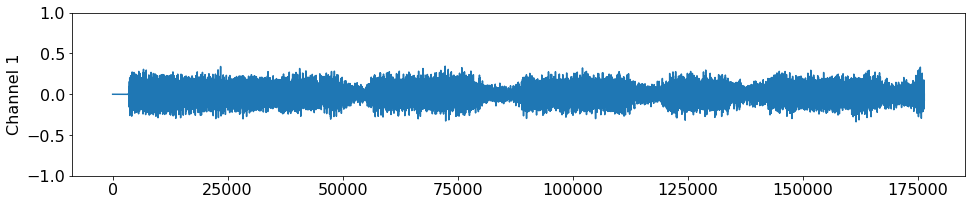

123.046875


<Figure size 1008x288 with 0 Axes>

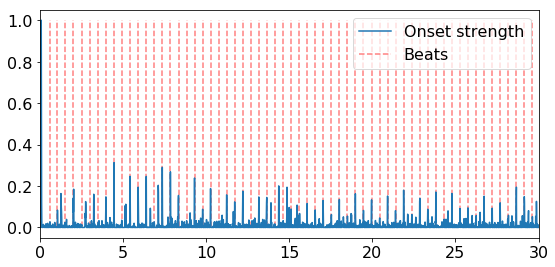

In [30]:
# provide/adjust the path to your wav or mp3 file

audiofile = "Hurricane_O.mp3"

samplerate, samplewidth, wavedata = audiofile_read(audiofile)

#wavedata = wavedata[:samplewidth*30]

nsamples = wavedata.shape[0]
nchannels = wavedata.shape[1]

print "Successfully read audio file:", audiofile
print samplerate, "Hz,", samplewidth*8, "bit,", nchannels, "channel(s),", nsamples, "samples"

max_samples_plot = 4 * samplerate # limit number of samples to plot (to 4 sec), to avoid graphical overflow

if nsamples < max_samples_plot:
    max_samples_plot = nsamples

#plot_waveform(wavedata[0:max_samples_plot], 16, 5);
# use combine the channels by calculating their geometric mean

wavedata_mono = np.mean(wavedata, axis=1)

plot_waveform(wavedata_mono[0:max_samples_plot], 16, 3)

#Onset detection

tempo, beats = librosa.beat.beat_track(wavedata_mono, samplerate)#
print(tempo)
onset_env = librosa.onset.onset_strength(wavedata_mono, samplerate, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=samplerate)

import matplotlib.pyplot as plt
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=samplerate, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 10-second window
plt.xlim(0, 30)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()

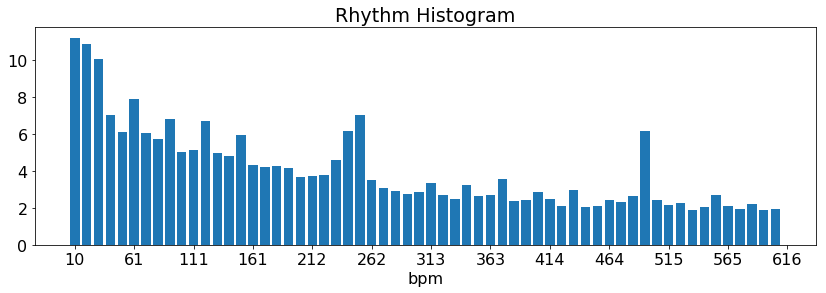

10.09368896484375


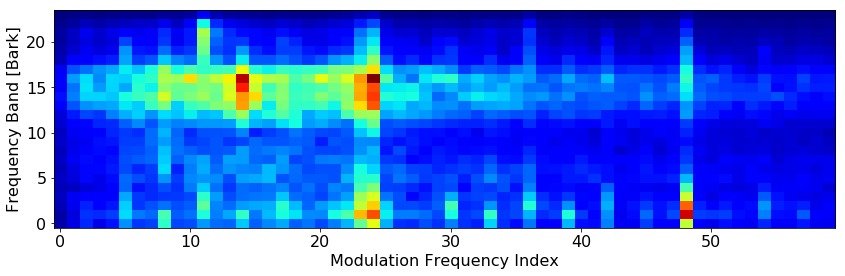

In [31]:
features = rp_extract(wavedata,                            # the two-channel wave-data of the audio-file
                                samplerate,                          # the samplerate of the audio-file
                                extract_rh          = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

plotrh(features['rh'])

maxbin = features['rh'].argmax(axis=0) + 1  # +1 because it starts from 0

mod_freq_res = 1.0 / (2**18/44100.0)  # resolution of modulation frequency axis (0.168 Hz) (= 1/(segment_size/samplerate))
#print mod_freq_res * 60 # resolution

bpm = maxbin * mod_freq_res * 60

print bpm

features = rp_extract(wavedata,                            # the two-channel wave-data of the audio-file
                                samplerate,                          # the samplerate of the audio-file
                                extract_ssd         = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

#plotssd(features['ssd'])

features_rp1 = rp_extract(wavedata,                            # the two-channel wave-data of the audio-file
                                samplerate,                          # the samplerate of the audio-file
                                extract_rp          = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

plotrp(features_rp1['rp'])

Decoded .mp3 with: ffmpeg -v 1 -y -i Hurricane_C.mp3 /tmp/2627152f-3371-46bd-97a3-fe1188f5aab7.wav
Successfully read audio file: Hurricane_O.mp3
44100 Hz, 16 bit, 2 channel(s), 11158319 samples


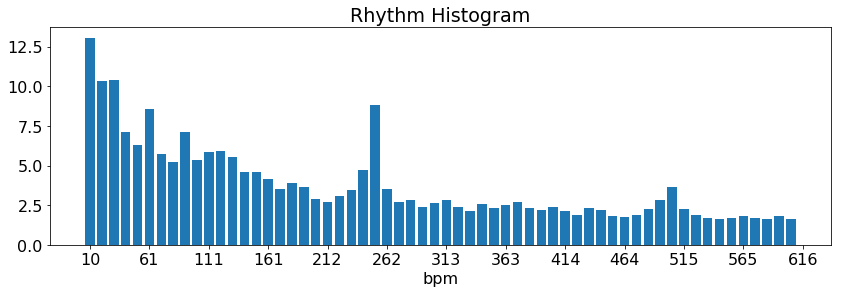

10.09368896484375


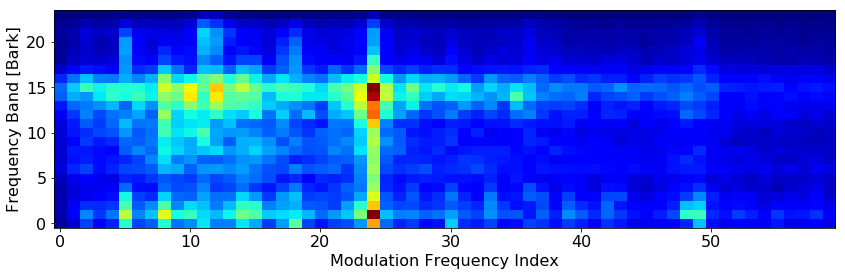

In [32]:
# provide/adjust the path to your wav or mp3 file

audiofile2 = "Hurricane_C.mp3"

samplerate, samplewidth, wavedata = audiofile_read(audiofile2)

nsamples = wavedata.shape[0]
nchannels = wavedata.shape[1]

print "Successfully read audio file:", audiofile
print samplerate, "Hz,", samplewidth*8, "bit,", nchannels, "channel(s),", nsamples, "samples"

max_samples_plot = 4 * samplerate # limit number of samples to plot (to 4 sec), to avoid graphical overflow

if nsamples < max_samples_plot:
    max_samples_plot = nsamples

#plot_waveform(wavedata[0:max_samples_plot], 16, 5);
# use combine the channels by calculating their geometric mean

wavedata_mono = np.mean(wavedata, axis=1)

#plot_waveform(wavedata_mono[0:max_samples_plot], 16, 3)

#RP extraction

features = rp_extract(wavedata,                            # the two-channel wave-data of the audio-file
                                samplerate,                          # the samplerate of the audio-file
                                extract_rh          = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

plotrh(features['rh'])

maxbin = features['rh'].argmax(axis=0) + 1  # +1 because it starts from 0

mod_freq_res = 1.0 / (2**18/44100.0)  # resolution of modulation frequency axis (0.168 Hz) (= 1/(segment_size/samplerate))
#print mod_freq_res * 60 # resolution

bpm = maxbin * mod_freq_res * 60

print bpm

features_rp2 = rp_extract(wavedata,                            # the two-channel wave-data of the audio-file
                                samplerate,                          # the samplerate of the audio-file
                                extract_rp          = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

plotrp(features_rp2['rp'])

126.04801829268293


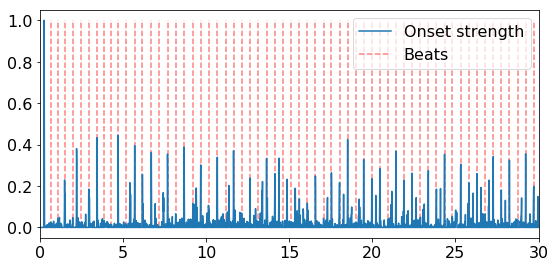

In [33]:
#Onset detection

tempo, beats = librosa.beat.beat_track(wavedata_mono, samplerate)#
print(tempo)
onset_env = librosa.onset.onset_strength(wavedata_mono, samplerate, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=samplerate)

import matplotlib.pyplot as plt
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=samplerate, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 10-second window
plt.xlim(0, 30)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()

('BPM:', 143.25018310546875)
('Beat positions (sec.):', array([  0.47600907,   0.9752381 ,   1.4512471 ,   1.9388661 ,
         2.4148753 ,   2.8908844 ,   3.3901134 ,   3.8893423 ,
         4.3885713 ,   4.87619   ,   5.3638096 ,   5.8398185 ,
         6.3274374 ,   6.815057  ,   7.3142858 ,   7.7902946 ,
         8.277914  ,   8.7655325 ,   9.183492  ,   9.601451  ,
        10.01941   ,  10.402539  ,  10.785668  ,  11.168798  ,
        11.551928  ,  11.911837  ,  12.271746  ,  12.643265  ,
        13.026394  ,  13.409524  ,  13.792653  ,  14.187392  ,
        14.582131  ,  14.976871  ,  15.37161   ,  15.766349  ,
        16.149479  ,  16.544218  ,  16.938957  ,  17.333696  ,
        17.728436  ,  18.146395  ,  18.564354  ,  18.982313  ,
        19.400272  ,  19.818232  ,  20.23619   ,  20.65415   ,
        21.07211   ,  21.490068  ,  21.896418  ,  22.302767  ,
        22.720726  ,  23.127075  ,  23.545034  ,  23.951384  ,
        24.380953  ,  24.81052   ,  25.2517    ,  25.681269  ,

Overall BPM (estimated before): 143.3
First histogram peak: 144.0 bpm
Second histogram peak: 123.0 bpm


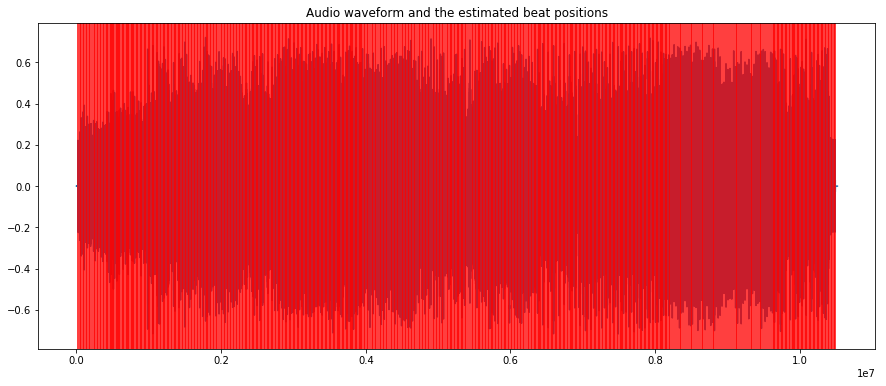

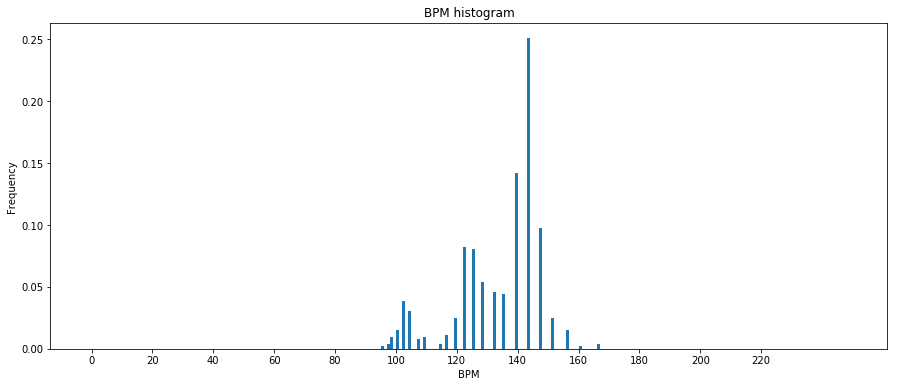

In [10]:
from essentia.standard import *

# Loading audio file
plt.rcParams.update({'font.size': 16})

audio = MonoLoader(filename='Space Anders.mp3')()

# Compute beat positions and BPM
rhythm_extractor = RhythmExtractor2013(method="multifeature")
bpm, beats, beats_confidence, _, beats_intervals = rhythm_extractor(audio)

print("BPM:", bpm)
print("Beat positions (sec.):", beats)
print("Beat estimation confidence:", beats_confidence)

# Mark beat positions on the audio and write it to a file
# Let's use beeps instead of white noise to mark them, as it's more distinctive
marker = AudioOnsetsMarker(onsets=beats, type='beep')
marked_audio = marker(audio)
MonoWriter(filename='Space Anders.mp3')(marked_audio)

import IPython
IPython.display.Audio('Space Anders.mp3')

from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 6) # set plot sizes to something larger than default

plot(audio)
for beat in beats:
    plt.axvline(x=beat*44100, color='red')

plt.title("Audio waveform and the estimated beat positions")

peak1_bpm, peak1_weight, peak1_spread, peak2_bpm, peak2_weight, peak2_spread, histogram = BpmHistogramDescriptors()(beats_intervals)

print("Overall BPM (estimated before): %0.1f" % bpm)
print("First histogram peak: %0.1f bpm" % peak1_bpm)
print("Second histogram peak: %0.1f bpm" % peak2_bpm)

fig, ax = plt.subplots()
ax.bar(range(len(histogram)), histogram, width=1)
ax.set_xlabel('BPM')
ax.set_ylabel('Frequency')
plt.title("BPM histogram")
ax.set_xticks([20 * x + 0.5 for x in range(int(len(histogram) / 20))])
ax.set_xticklabels([str(20 * x) for x in range(int(len(histogram) / 20))])
plt.show()